In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

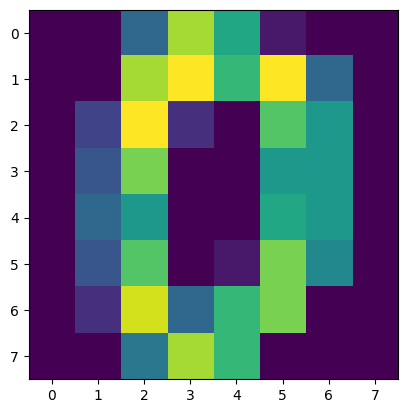

In [2]:
data = datasets.load_digits()
plt.subplot()
plt.imshow(data.images[0])

Getting images and their labels

In [3]:
image_and_label = list(zip(data.images, data.target))
image_and_label[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 0)

Define X and y for modeling

In [4]:
X = data.images.reshape((len(data.images), -1))
y = data.target

## Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Find best Regularization parameter for model

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99


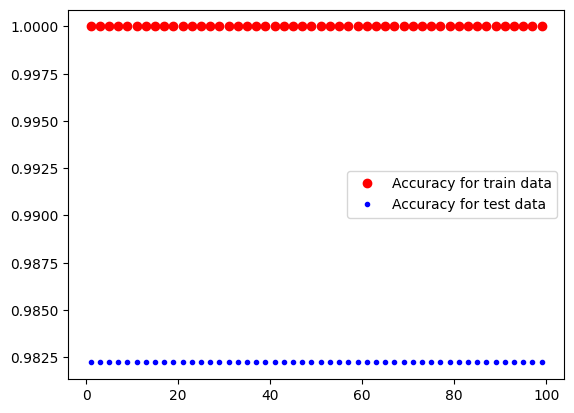

In [6]:
C = np.arange(1, 100, 2)
accuracy_tr = []
accuracy_te = []
for c in C:
    print(c)
    model = SVC(kernel='linear', C = c)
    model.fit(X_train, y_train)
    y_pre_tr = model.predict(X_train)
    y_pre_te = model.predict(X_test)
    accuracy_tr.append(metrics.accuracy_score(y_train, y_pre_tr))
    accuracy_te.append(metrics.accuracy_score(y_test, y_pre_te))



plt.plot(C, accuracy_tr, 'ro')
plt.plot(C, accuracy_te, 'b.')
plt.legend(['Accuracy for train data', 'Accuracy for test data'])
plt.show()

## Final SVM model

In [7]:
model = SVC(kernel='linear', C = 10)
model.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [8]:
y_pre = model.predict(X_test)

In [9]:
print(metrics.classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.98      0.93      0.96        46
           4       1.00      0.98      0.99        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       1.00      0.97      0.99        38
           9       0.96      0.96      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450


In [10]:
metrics.accuracy_score(y_test, y_pre)

0.9822222222222222